<a href="https://colab.research.google.com/github/KamarulAdha/Jupyter-Notebooks/blob/main/KNN_Pi_Day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Predicting the Price of AirBnB**


---





---


# Import The Modules


---



In [ ]:
""" Import Modules """
import numpy as np
import pandas as pd
import warnings

pd.set_option("display.expand_frame_repr", False)
warnings.filterwarnings("ignore")



---


# Import The Data


---



In [ ]:
""" Import dataset from local drive """
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv


In [ ]:
import io

dc_listings = pd.read_csv(io.BytesIO(uploaded["listings.csv"]))



---


# Data Preprocessing (Selecting & Cleaning)


---



In [ ]:
""" Select Important Features """
dc_listings.columns
dc_listings = dc_listings[['accommodates', 'bedrooms', 'bathrooms','number_of_reviews','price']]

In [ ]:
""" Remove Special Characters From Data """
dc_listings["price"].head()

dc_listings['price'] = dc_listings['price'].apply(lambda x:x.replace('$',''))
dc_listings['price'] = dc_listings['price'].apply(lambda x:x.replace(',',''))
dc_listings['price'] = dc_listings['price'].astype('float')

In [ ]:
""" Delete Empty Data """
dc_listings = dc_listings.dropna(axis=0)
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3722
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       3675 non-null   int64  
 1   bedrooms           3675 non-null   float64
 2   bathrooms          3675 non-null   float64
 3   number_of_reviews  3675 non-null   int64  
 4   price              3675 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 172.3 KB




---


# Train The Data


---



In [ ]:
""" Take 70% for Training, 30% for Testing """
train_rows  =  int(dc_listings.shape[0] * 0.7)
train = dc_listings.iloc[0:train_rows]
test = dc_listings.iloc[train_rows:]

In [ ]:
""" Remove Price from Feature """
features = list(train.columns)
features.remove('price')
print(features)

['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']


# Euclidean Distance Formula
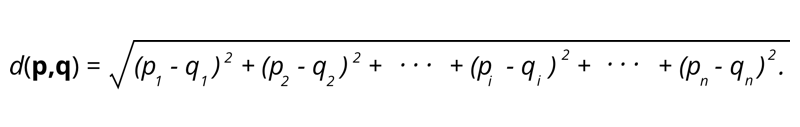



---


# Applying the Euclidean Distance Formula (K = 5)


---



In [ ]:
def predict_price(row,temp_df):

    """ Distance between the unlabeled data and the labeled data """
    distances = temp_df[features] - row

    """ Squaring the distance """
    squared = np.square(distances)

    """ Sum up all the squared distance values """
    dist = squared.sum(axis=1)

    """ Square root the sum of the squared distance """
    temp_df['distance'] = dist**0.5

    """Sort the euclidean distance in ascending order """
    new_df = temp_df.sort_values('distance')

    """ Choosing 5 nearest-neighbours (K=5) """
    nearest_neighbor_prices = new_df['price'].iloc[0:5]

    """ Get the mean value for the 5 data """
    predicted_price = nearest_neighbor_prices.mean()

    """ Predicted Price for New Data """
    return predicted_price



---


# Testing the Data


---



In [ ]:
""" Test the Data """
for i,row in test[features].iterrows():
    predicted_price = predict_price(row,train)
    test.loc[i,'predicted_price'] = predicted_price

In [ ]:
""" Mean Absolute Error """
mae = np.absolute(test['price'] - test['predicted_price']).sum()/test.shape[0]
print(mae)

53.762828649138704




---


# Predicting the Price Based On **Accomodation**, **Number of Bedrooms**, **Number of Bathrooms**, and **Number of Reviews**


---



In [ ]:
""" Features = ['accommodates', 'bedrooms', 'bathrooms','number_of_reviews'] """
new_airbnb = pd.Series([2,1,1,0])
new_airbnb.index = pd.Index(features)
predicted_price = predict_price(new_airbnb,train)
print("The predicted price for the new AirBnB is $%d per night."%(predicted_price))

The predicted price for the new AirBnB is $143 per night.
